# Analysis of different ML algorithms applied to heart failure prediction problem

**Table of Content**
1. Modules configuration
2. Data
    - 2.1. Attribute Information
    - 2.2. Importing data
    - 2.3. Analysing data
3. Part 1: ZR and NBG


***

## 1. Modules configuration

In [1]:
# DataSci basic modules
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Preprosseing
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

# ML algorithms
from sklearn.dummy import DummyClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans

# Train-test related modules
from sklearn.model_selection import cross_val_score, cross_validate, GridSearchCV, RepeatedStratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Metrics
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, accuracy_score,\
                balanced_accuracy_score, precision_score, recall_score, f1_score

# Others
import itertools

***

## 2. Data

The data used in this project is part of the [Heart Failure Prediction Dataset](https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction?select=heart.csv), composed of 5 different datasets from:
- Cleveland: 303 observations
- Hungarian: 294 observations
- Switzerland: 123 observations
- Long Beach VA: 200 observations
- Stalog (Heart) Data Set: 270 observations

The final dataset, after the removal of duplicates, has 918 instances, 11 different features and 2 classes. 



### 2.1. Attribute Information

| Atribute | Description | Value type |
|---|---|---|
|Age | Age of the patient in years | Continuous |
| Sex | Sex of the patient with M: Male, F: Female. | Binary categorical |
| ChestPainType | Chest pain type with TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic. | Categorical  |
| RestingBP | Resting blood pressure measured in mm Hg | Continuous |
| Cholesterol | Serum cholesterol in mm/dl | Continuous |
| FastingBS | Fasting blood sugar with 1: if FastingBS > 120 mg/dl, 0: otherwise | Binary categorical |
| RestingECG | Resting electrocardiogram results with values Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria | Categorical |
| MaxHR | Maximum heart rate achieved with numeric value between 60 and 202 | Continuous |
| ExerciseAngina | Exercise-induced angina with Y: Yes, N: No. | Binary categorical |
| Oldpeak | Oldpeak = ST with numeric value measured in depression. | Continuous |
| ST_Slope | The slope of the peak exercise ST segment with Up: upsloping, Flat: flat, Down: downsloping. | Categorical |
| HeartDisease | Output class with 1: heart disease, 0: Normal. | Binary categorical |

### 2.2. Importing data

In [2]:
PATH = "../data/heart.csv"
raw_data = pd.read_csv(PATH, sep=',')
raw_data.head(8)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0


### 2.3. Analysing data

In [3]:
raw_data_corr = raw_data.corr()
raw_data_corr

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
Age,1.000000,0.254399,-0.095282,0.198039,-0.382045,0.258612,0.282039
RestingBP,0.254399,1.000000,0.100893,0.070193,-0.112135,0.164803,0.107589
Cholesterol,-0.095282,0.100893,1.000000,-0.260974,0.235792,0.050148,-0.232741
FastingBS,0.198039,0.070193,-0.260974,1.000000,-0.131438,0.052698,0.267291
MaxHR,-0.382045,-0.112135,0.235792,-0.131438,1.000000,-0.160691,-0.400421
Oldpeak,0.258612,0.164803,0.050148,0.052698,-0.160691,1.000000,0.403951
HeartDisease,0.282039,0.107589,-0.232741,0.267291,-0.400421,0.403951,1.000000


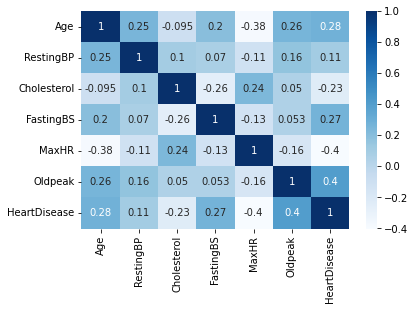

In [4]:
sns.heatmap(raw_data_corr, annot=True, cmap="Blues")
plt.show()

Age, FastingBS and Oldpeak seems to be the attributes with the highest correlation with Heart Disease. MAXHR and HeartDisease also have a high negative correlation.

#### Initial attribute types

In [5]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [6]:
raw_data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


#### Analysing continuous values

In [7]:
continuous_variables = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
raw_data[continuous_variables].describe()

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak
count,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,136.809368,0.887364
std,9.432617,18.514154,109.384145,25.460334,1.066570
min,28.000000,0.000000,0.000000,60.000000,-2.600000
25%,47.000000,120.000000,173.250000,120.000000,0.000000
50%,54.000000,130.000000,223.000000,138.000000,0.600000
75%,60.000000,140.000000,267.000000,156.000000,1.500000
max,77.000000,200.000000,603.000000,202.000000,6.200000


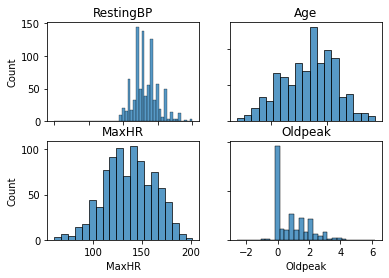

In [8]:
fig, ax = plt.subplots(nrows=2, ncols=2)

output = sns.histplot(raw_data, x="RestingBP", ax=ax[0,0])
ax[0,0].set_title('RestingBP')

output = sns.histplot(raw_data, x="Age", ax=ax[0,1])
ax[0,1].set_title('Age')

output = sns.histplot(raw_data, x="MaxHR", ax=ax[1,0])
ax[1,0].set_title('MaxHR')

output = sns.histplot(raw_data, x="Oldpeak", ax=ax[1,1])
ax[1,1].set_title('Oldpeak')

for a in ax.flat:
    a.label_outer()
    
plt.show()

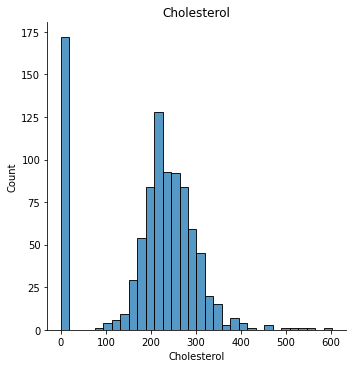

In [9]:
sns.displot(raw_data, x="Cholesterol")
plt.title("Cholesterol")
plt.show()

In [10]:
zero_cholesterol = raw_data[raw_data['Cholesterol'] == 0]

In [11]:
zero_cholesterol.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,172.000000,172.000000,172.0,172.000000,172.000000,172.000000,172.000000
mean,56.238372,129.680233,0.0,0.517442,121.988372,0.825581,0.883721
std,8.616327,22.971558,0.0,0.501155,24.166331,1.039645,0.321495
min,32.000000,0.000000,0.0,0.000000,60.000000,-2.600000,0.000000
25%,51.750000,115.000000,0.0,0.000000,108.000000,0.000000,1.000000
50%,57.500000,129.000000,0.0,1.000000,120.000000,0.750000,1.000000
75%,62.000000,140.000000,0.0,1.000000,138.250000,1.500000,1.000000
max,74.000000,200.000000,0.0,1.000000,182.000000,3.700000,1.000000


In [17]:
zero_cholesterol["FastingBS"].value_counts(normalize=True)

1    0.517442
0    0.482558
Name: FastingBS, dtype: float64

In [28]:
zero_cholesterol["FastingBS"].value_counts()

1    89
0    83
Name: FastingBS, dtype: int64

In [19]:
zero_cholesterol["HeartDisease"].value_counts(normalize=True)

1    0.883721
0    0.116279
Name: HeartDisease, dtype: float64

In [21]:
zero_cholesterol["HeartDisease"].value_counts()

1    152
0     20
Name: HeartDisease, dtype: int64

In [12]:
print(f"Amount of cholesterol = 0 in the dataset: {len(zero_cholesterol)/918 * 100:0.2f}%")

Amount of cholesterol = 0 in the dataset: 18.74%


In [14]:
valued_cholesterol = raw_data[raw_data['Cholesterol'] != 0]
valued_cholesterol.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000
mean,52.882038,133.022788,244.635389,0.167560,140.226542,0.901609,0.477212
std,9.505888,17.282750,59.153524,0.373726,24.524107,1.072861,0.499816
min,28.000000,92.000000,85.000000,0.000000,69.000000,-0.100000,0.000000
25%,46.000000,120.000000,207.250000,0.000000,122.000000,0.000000,0.000000
50%,54.000000,130.000000,237.000000,0.000000,140.000000,0.500000,0.000000
75%,59.000000,140.000000,275.000000,0.000000,160.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [18]:
valued_cholesterol["FastingBS"].value_counts(normalize=True)

0    0.83244
1    0.16756
Name: FastingBS, dtype: float64

In [27]:
valued_cholesterol["FastingBS"].value_counts()

0    621
1    125
Name: FastingBS, dtype: int64

In [20]:
valued_cholesterol["HeartDisease"].value_counts(normalize=True)

0    0.522788
1    0.477212
Name: HeartDisease, dtype: float64

In [22]:
raw_data["HeartDisease"].value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

In [24]:
raw_data["HeartDisease"].value_counts(normalize=True)

1    0.553377
0    0.446623
Name: HeartDisease, dtype: float64

In [26]:
raw_data["FastingBS"].value_counts(normalize=True)

0    0.766885
1    0.233115
Name: FastingBS, dtype: float64

In [30]:
raw_data["FastingBS"].value_counts()

0    704
1    214
Name: FastingBS, dtype: int64

In [25]:
152/508

0.2992125984251969

In [31]:
89/214

0.4158878504672897

If the rows with cholesterol = 0 were to be removed, the class of HeatDisease would lose 29.9% of the positive cases. The ratio would go from 55:45 to 52:48, with 746 cases instead of 918. Also a lot of the cases (41.6%) of fasting don't have information on cholesterol. If we were to remove the tuples where cholesterol is 0, the situation where the patient isn't fasting  goes from 76.7% to 83.2%, making this attribute even more inbalanced.

In [15]:
cholesterol_corr = valued_cholesterol.corr(method ='spearman')
cholesterol_corr

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
Age,1.000000,0.284774,0.083445,0.240171,-0.363049,0.334900,0.307044
RestingBP,0.284774,1.000000,0.092371,0.174927,-0.131590,0.200337,0.177632
Cholesterol,0.083445,0.092371,1.000000,0.044568,-0.002708,0.086065,0.114898
FastingBS,0.240171,0.174927,0.044568,1.000000,-0.097683,0.095044,0.160594
MaxHR,-0.363049,-0.131590,-0.002708,-0.097683,1.000000,-0.303483,-0.385004
Oldpeak,0.334900,0.200337,0.086065,0.095044,-0.303483,1.000000,0.504321
HeartDisease,0.307044,0.177632,0.114898,0.160594,-0.385004,0.504321,1.000000


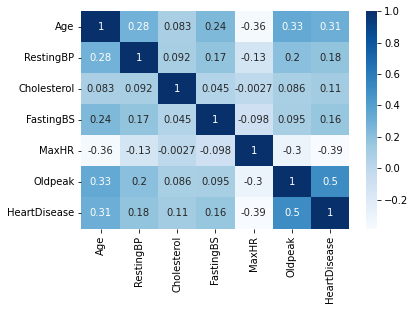

In [14]:
sns.heatmap(cholesterol_corr, annot=True, cmap="Blues")
plt.show()

In [15]:
cholesterol = raw_data["Cholesterol"].to_numpy()
heart_disease = raw_data["HeartDisease"].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(cholesterol, heart_disease, test_size=0.30, random_state=36851234, stratify=heart_disease)

imp = SimpleImputer(missing_values=0, strategy='mean')
imp.fit(X_train.reshape(-1, 1))  

mean_chol_transf = imp.transform(X_test.reshape(-1, 1))
mean_chol_transf = np.array([i for j in mean_chol_transf for i in j])

In [16]:
mean_chol_df = pd.DataFrame({"Cholesterol":mean_chol_transf, "HeartDisease":y_test})
mean_chol_corr = mean_chol_df.corr()
mean_chol_corr

,Cholesterol,HeartDisease
Cholesterol,1.000000,0.104819
HeartDisease,0.104819,1.000000


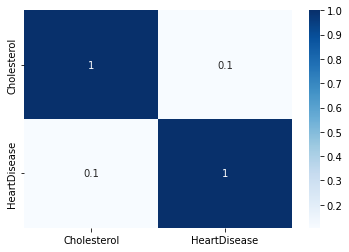

In [17]:
sns.heatmap(mean_chol_corr, annot=True, cmap="Blues")
plt.show()

Due to the uncertain nature of the cholesterol values that are equal to 0, and it taking up 18.74% of the values, it was decided that the attribute Cholesterol shouldn't be used. Since the context of the problem depends on a greater knowledge of a few medical characteristics and we don't have any acess to a medical professional, it was decided that the use of a medium or a mean value could create an impact in the analyses of an uncertainty. When using mean, the correlation also did not change much from values that are not null.

In [18]:
raw_data.drop(["Cholesterol"], axis=1, inplace=True)

#### Description of categorical values

In [19]:
raw_data['Sex'].value_counts(normalize=True)

M    0.78976
F    0.21024
Name: Sex, dtype: float64

In [20]:
raw_data['ChestPainType'].value_counts(normalize=True)

ASY    0.540305
NAP    0.221133
ATA    0.188453
TA     0.050109
Name: ChestPainType, dtype: float64

In [21]:
raw_data['FastingBS'].value_counts(normalize=True)

0    0.766885
1    0.233115
Name: FastingBS, dtype: float64

In [22]:
raw_data['RestingECG'].value_counts(normalize=True)

Normal    0.601307
LVH       0.204793
ST        0.193900
Name: RestingECG, dtype: float64

In [23]:
raw_data['ExerciseAngina'].value_counts(normalize=True)

N    0.595861
Y    0.404139
Name: ExerciseAngina, dtype: float64

In [24]:
raw_data['ST_Slope'].value_counts(normalize=True)

Flat    0.501089
Up      0.430283
Down    0.068627
Name: ST_Slope, dtype: float64

In [25]:
raw_data['HeartDisease'].value_counts(normalize=True)

1    0.553377
0    0.446623
Name: HeartDisease, dtype: float64

In [26]:
sex_dict = {"M":0, "F":1}
chestpain_dict = {"ASY":0, "NAP":1, "ATA":2, "TA": 3}
resting_dict = {"Normal":0, "LVH":1, "ST":2}
exercise_dict = {"N":0, "Y":1}
slope_dict = {"Flat":0, "Up":1, "Down":2}

category_dict = {"Sex":sex_dict, 
                 "ChestPainType":chestpain_dict, 
                 "RestingECG": resting_dict, 
                 "ExerciseAngina":exercise_dict, 
                 "ST_Slope":slope_dict}

In [27]:
raw_data.replace(category_dict, inplace=True)

In [28]:
raw_data.head()

,Age,Sex,ChestPainType,RestingBP,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,0,2,140,0,0,172,0,0.0,1,0
1,49,1,1,160,0,0,156,0,1.0,0,1
2,37,0,2,130,0,2,98,0,0.0,1,0
3,48,1,0,138,0,0,108,1,1.5,0,1
4,54,0,1,150,0,0,122,0,0.0,1,0


## 3. Part 1: ZR and NBG

## References

- https://www.investopedia.com/ask/answers/040815/how-should-i-interpret-negative-correlation.asp
- https://arxiv.org/pdf/1604.07202.pdf - An Approach to Find Missing Values in Medical Datasets